In [1]:
import tensorflow as tf

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
np.set_printoptions(precision=4)

In [3]:
from sklearn.preprocessing import StandardScaler
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers import SGD

Using TensorFlow backend.


In [4]:
path = 'C:/Users/emrijai/Documents/IPython Notebooks/MSDS 6120 - Capstone B'
os.chdir(path)

print (path)

C:/Users/emrijai/Documents/IPython Notebooks/MSDS 6120 - Capstone B


In [5]:
df_fe = pd.read_csv('Datasets/Final_Prepared_datafiles/Chunks/Normalized_Train80_Chunk1.csv')
df_test = pd.read_csv('Datasets/Final_Prepared_datafiles/Chunks/Normalized_Test20_Chunk1.csv')

In [6]:
df_fe.head()

,ID,SEGMENT_ID,CYCLE_ID,L_CYCLE,L_PREOVULATION,L_PERIOD,Pre_PreOvL1,Pre_PreOvL2,Pre_L_CYCLE1,Pre_L_Period1,...,Med3-Med6,Med3-Mean6,Med3-Min6,Mean3-Med6,Mean3-Mean6,Mean3-Min6,Max3-Median6,Max3-Mean6,Max3-Min6,Sum_Of_All
0,9.0,1.0,1.0,29.0,13.0,6.0,13.0,13.0,29.0,6.0,...,-0.610512,-0.610512,-0.610512,-0.402721,-0.402721,-0.402721,0.102897,0.102897,0.102897,-2.731009
1,9.0,1.0,1.0,29.0,13.0,6.0,13.0,13.0,29.0,6.0,...,-0.610512,-0.627662,-0.610512,-0.623524,-0.640674,-0.623524,-0.559513,-0.576662,-0.559513,-5.432096
2,9.0,1.0,1.0,29.0,13.0,6.0,13.0,13.0,29.0,6.0,...,-0.559513,-0.459904,0.141035,-0.374240,-0.274631,0.326308,0.047306,0.146915,0.747854,-0.258870
3,9.0,1.0,1.0,29.0,13.0,6.0,13.0,13.0,29.0,6.0,...,-0.450396,-0.249036,0.250151,-0.320868,-0.119507,0.379680,0.047306,0.248667,0.747854,0.533852
4,9.0,1.0,1.0,29.0,13.0,6.0,13.0,13.0,29.0,6.0,...,-0.116826,-0.101970,0.303965,0.013199,0.028055,0.433990,0.327063,0.341919,0.747854,1.977248


In [7]:
df_fe.iloc[1:3,0:]

,ID,SEGMENT_ID,CYCLE_ID,L_CYCLE,L_PREOVULATION,L_PERIOD,Pre_PreOvL1,Pre_PreOvL2,Pre_L_CYCLE1,Pre_L_Period1,...,Med3-Med6,Med3-Mean6,Med3-Min6,Mean3-Med6,Mean3-Mean6,Mean3-Min6,Max3-Median6,Max3-Mean6,Max3-Min6,Sum_Of_All
1,9.0,1.0,1.0,29.0,13.0,6.0,13.0,13.0,29.0,6.0,...,-0.610512,-0.627662,-0.610512,-0.623524,-0.640674,-0.623524,-0.559513,-0.576662,-0.559513,-5.432096
2,9.0,1.0,1.0,29.0,13.0,6.0,13.0,13.0,29.0,6.0,...,-0.559513,-0.459904,0.141035,-0.374240,-0.274631,0.326308,0.047306,0.146915,0.747854,-0.258870


In [8]:
df_fe = df_fe.dropna()
df_test = df_test.dropna()

In [9]:
X_train = np.array(df_fe.ix[:,['Pre_L_Period1','Pre_L_Period2','01_TEMP','02_TEMP','03_TEMP','04_TEMP','05_TEMP','06_TEMP','07_TEMP','08_TEMP','09_TEMP',
                                   'Pre_PreOvL1','Pre_PreOvL2','Pre_L_CYCLE1','Pre_L_CYCLE2','LastMonth_rolling_PREOVULATION',
                                   'Med3-Med6','Med3-Mean6','Med3-Min6','Mean3-Med6','Mean3-Mean6','Mean3-Min6','Max3-Median6',
                               'Max3-Mean6','Max3-Min6','Sum_Of_All']], dtype='float64')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [10]:
X_test = np.array(df_test.ix[:,['Pre_L_Period1','Pre_L_Period2','01_TEMP','02_TEMP','03_TEMP','04_TEMP','05_TEMP','06_TEMP','07_TEMP','08_TEMP','09_TEMP',
                                   'Pre_PreOvL1','Pre_PreOvL2','Pre_L_CYCLE1','Pre_L_CYCLE2','LastMonth_rolling_PREOVULATION',
                                   'Med3-Med6','Med3-Mean6','Med3-Min6','Mean3-Med6','Mean3-Mean6','Mean3-Min6','Max3-Median6',
                               'Max3-Mean6','Max3-Min6','Sum_Of_All']], dtype='float64')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [11]:
sc = StandardScaler()

In [12]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [13]:
X_train.shape

(50694, 26)

In [14]:
X_test.shape

(13613, 26)

In [15]:
y_train = np.array(df_fe.ix[:,['Target_Pre_OV']], dtype='float64')

In [16]:
y_train[0:10]

array([[ 13.],
       [ 12.],
       [ 11.],
       [ 10.],
       [  9.],
       [  8.],
       [  7.],
       [  6.],
       [  5.],
       [  4.]])

In [17]:
y_test = np.array(df_test.ix[:,['Target_Pre_OV']], dtype='float64')

In [18]:
y_test[0:10]

array([[  1.],
       [  0.],
       [ 11.],
       [ 10.],
       [  9.],
       [  8.],
       [  7.],
       [  6.],
       [  5.],
       [  4.]])

In [19]:
y_train.shape

(50694, 1)

In [20]:
y_test.max()

30.0

In [21]:
output_vector_length = y_train.max()

In [22]:
output_vector_length

30.0

In [23]:
from keras.utils.np_utils import to_categorical

In [24]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [25]:
y_train_cat[0:5]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [26]:
y_test_cat[0:5]

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [27]:
print (X_train.shape)
# print (y_train_cat.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)
# print (y_test_cat.shape)
print (y_train_cat.shape)
print (y_test_cat.shape)

(50694, 26)
(13613, 26)
(50694, 1)
(13613, 1)
(50694, 31)
(13613, 31)


### Building a 1D CNN Model with standardized variables

In [28]:
X_train = X_train.reshape(-1,1,int(X_train.shape[1]),1)

In [29]:
X_test = X_test.reshape(-1,1,int(X_test.shape[1]),1)

In [30]:
print (X_train.shape)
print (X_test.shape)

(50694, 1, 26, 1)
(13613, 1, 26, 1)


In [31]:
from keras import backend as K
from keras.layers import Flatten, Activation
from keras.layers import MaxPool2D, AvgPool2D
from keras import metrics

from keras.layers import Conv1D
from keras.layers import Conv2D
from keras.models import Sequential
from keras.layers import Dense

In [32]:
K.clear_session()

model = Sequential()
model.add(Conv2D(32,(1,3), strides=(1,1), input_shape=(1,int(X_train.shape[2]),1), padding='same'))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Activation('tanh'))

model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dense(1, activation='linear'))


model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['mae', 'acc'])


In [33]:
print (model.summary())
print ('Model Optput Shape :' + str(model.output_shape))
print ('Model y_train Shape :' + str(y_train.shape))
print ('Model X_train Shape :' + str(X_train.shape))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 26, 32)         128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 26, 32)         0         
_________________________________________________________________
activation_1 (Activation)    (None, 1, 26, 32)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 832)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                53312     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 53,505
Trainable params: 53,505
Non-trainable params: 0
_________________________________________________________________
None
M

In [34]:
model.fit(X_train, y_train, batch_size=64,
          epochs=50, verbose=1, validation_split=0.2)

Train on 40555 samples, validate on 10139 samples
Epoch 1/50
40555/40555 [==============================] - 3s - loss: 8.5927 - mean_absolute_error: 2.1154 - acc: 0.1723 - val_loss: 6.8085 - val_mean_absolute_error: 1.9239 - val_acc: 0.1883
Epoch 2/50
40555/40555 [==============================] - 3s - loss: 7.1687 - mean_absolute_error: 1.9217 - acc: 0.1931 - val_loss: 6.6184 - val_mean_absolute_error: 1.9006 - val_acc: 0.1878
Epoch 3/50
40555/40555 [==============================] - 3s - loss: 6.9590 - mean_absolute_error: 1.8873 - acc: 0.1995 - val_loss: 6.6890 - val_mean_absolute_error: 1.8946 - val_acc: 0.1966
Epoch 4/50
40555/40555 [==============================] - 3s - loss: 6.8698 - mean_absolute_error: 1.8749 - acc: 0.2009 - val_loss: 6.9877 - val_mean_absolute_error: 1.9353 - val_acc: 0.1961
Epoch 5/50
40555/40555 [==============================] - 3s - loss: 6.7651 - mean_absolute_error: 1.8601 - acc: 0.2062 - val_loss: 6.6330 - val_mean_absolute_error: 1.8653 - val_acc: 0.

40555/40555 [==============================] - 3s - loss: 4.4343 - mean_absolute_error: 1.5520 - acc: 0.2296 - val_loss: 8.1061 - val_mean_absolute_error: 2.1137 - val_acc: 0.1730
Epoch 44/50
40555/40555 [==============================] - 3s - loss: 4.3868 - mean_absolute_error: 1.5467 - acc: 0.2279 - val_loss: 8.5079 - val_mean_absolute_error: 2.1560 - val_acc: 0.1689
Epoch 45/50
40555/40555 [==============================] - 3s - loss: 4.3230 - mean_absolute_error: 1.5355 - acc: 0.2307 - val_loss: 8.4922 - val_mean_absolute_error: 2.1424 - val_acc: 0.1733
Epoch 46/50
40555/40555 [==============================] - 3s - loss: 4.2485 - mean_absolute_error: 1.5254 - acc: 0.2289 - val_loss: 8.6976 - val_mean_absolute_error: 2.1633 - val_acc: 0.1732
Epoch 47/50
40555/40555 [==============================] - 3s - loss: 4.2143 - mean_absolute_error: 1.5217 - acc: 0.2294 - val_loss: 8.4611 - val_mean_absolute_error: 2.1570 - val_acc: 0.1733
Epoch 48/50
40555/40555 [===========================

### Building a 1D CNN Regression Model of standardized variables with Dropout regularization

In [35]:
from keras.layers import Dropout

K.clear_session()

model = Sequential()
model.add(Conv2D(32,(1,1), strides=(1,1), input_shape=(1,int(X_train.shape[2]),1), padding='same'))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Activation('tanh'))

model.add(Conv2D(64,(1,1)))
model.add(MaxPool2D(pool_size=(1,1), strides=(1,1)))
model.add(Activation('tanh'))

model.add(Flatten())
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', 
              optimizer ='adam', 
              metrics =['mae', 'acc'])


In [36]:
print (model.summary())
print ('Model Optput Shape :' + str(model.output_shape))
print ('Model y_train Shape :' + str(y_train.shape))
print ('Model X_train Shape :' + str(X_train.shape))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 26, 32)         64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 26, 32)         0         
_________________________________________________________________
activation_1 (Activation)    (None, 1, 26, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 26, 64)         2112      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 26, 64)         0         
_________________________________________________________________
activation_2 (Activation)    (None, 1, 26, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1664)              0         
__________

In [37]:
h = model.fit(X_train, y_train, batch_size=512,
          epochs=50, verbose=1, validation_split=0.2)

Train on 40555 samples, validate on 10139 samples
Epoch 1/50
40555/40555 [==============================] - 4s - loss: 39.0156 - mean_absolute_error: 4.8333 - acc: 0.0667 - val_loss: 18.3883 - val_mean_absolute_error: 3.2568 - val_acc: 0.1038
Epoch 2/50
40555/40555 [==============================] - 4s - loss: 15.5401 - mean_absolute_error: 2.9004 - acc: 0.1259 - val_loss: 11.3156 - val_mean_absolute_error: 2.4667 - val_acc: 0.1464
Epoch 3/50
40555/40555 [==============================] - 4s - loss: 11.4909 - mean_absolute_error: 2.4585 - acc: 0.1505 - val_loss: 8.8410 - val_mean_absolute_error: 2.1670 - val_acc: 0.1670
Epoch 4/50
40555/40555 [==============================] - 4s - loss: 10.0682 - mean_absolute_error: 2.3057 - acc: 0.1600 - val_loss: 7.9737 - val_mean_absolute_error: 2.0737 - val_acc: 0.1711
Epoch 5/50
40555/40555 [==============================] - 4s - loss: 9.5648 - mean_absolute_error: 2.2659 - acc: 0.1555 - val_loss: 7.5552 - val_mean_absolute_error: 2.0098 - val_a

40555/40555 [==============================] - 4s - loss: 8.2537 - mean_absolute_error: 2.1238 - acc: 0.1667 - val_loss: 6.6413 - val_mean_absolute_error: 1.9102 - val_acc: 0.1903
Epoch 44/50
40555/40555 [==============================] - 4s - loss: 8.2665 - mean_absolute_error: 2.1220 - acc: 0.1655 - val_loss: 6.6768 - val_mean_absolute_error: 1.9091 - val_acc: 0.2000
Epoch 45/50
40555/40555 [==============================] - 4s - loss: 8.2565 - mean_absolute_error: 2.1217 - acc: 0.1653 - val_loss: 6.6539 - val_mean_absolute_error: 1.8784 - val_acc: 0.2080
Epoch 46/50
40555/40555 [==============================] - 4s - loss: 8.1943 - mean_absolute_error: 2.1155 - acc: 0.1672 - val_loss: 6.6238 - val_mean_absolute_error: 1.8977 - val_acc: 0.1960
Epoch 47/50
40555/40555 [==============================] - 4s - loss: 8.2048 - mean_absolute_error: 2.1179 - acc: 0.1665 - val_loss: 6.8782 - val_mean_absolute_error: 1.9462 - val_acc: 0.1951
Epoch 48/50
40555/40555 [===========================

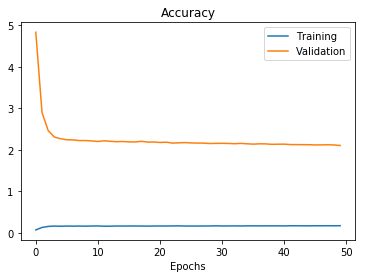

In [38]:
plt.plot(h.history['acc'])
# plt.plot(h.history['mean_absolute_error'])
plt.plot(h.history['mean_absolute_error'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [39]:
Y_pred_Regression = model.predict(X_test)
print (Y_pred_Regression)

[[  1.196 ]
 [  1.1733]
 [ 15.5324]
 ..., 
 [  1.6106]
 [  0.8016]
 [  0.0495]]


### Building a 1D CNN "Multiclass" Classification Model of standardized variables with Dropout regularization

In [83]:
K.clear_session()

model = Sequential()
model.add(Conv2D(32,(1,3), strides=(1,1), input_shape=(1,int(X_train.shape[2]),1), padding='same'))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Activation('tanh'))

model.add(Conv2D(64,(1,1)))
model.add(MaxPool2D(pool_size=(1,1), strides=(1,1)))
model.add(Activation('tanh'))

model.add(Flatten())
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(int(output_vector_length)+1, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy', 
              optimizer ='adam', 
              metrics =['accuracy','categorical_accuracy'])

In [84]:
print (model.summary())
print ('Model Optput Shape :' + str(model.output_shape))
print ('Model y_train Shape :' + str(y_train.shape))
print ('Model X_train Shape :' + str(X_train.shape))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 26, 32)         128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 26, 32)         0         
_________________________________________________________________
activation_1 (Activation)    (None, 1, 26, 32)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 26, 64)         2112      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 26, 64)         0         
_________________________________________________________________
activation_2 (Activation)    (None, 1, 26, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1664)              0         
__________

In [85]:
# h = model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_split=0.35)

h = model.fit(X_train, y_train_cat, batch_size=512,
          epochs=100, verbose=1, validation_split=0.20)

Train on 40555 samples, validate on 10139 samples
Epoch 1/100
40555/40555 [==============================] - 6s - loss: 2.7819 - acc: 0.1818 - categorical_accuracy: 0.1818 - val_loss: 2.3502 - val_acc: 0.2483 - val_categorical_accuracy: 0.2483
Epoch 2/100
40555/40555 [==============================] - 6s - loss: 2.2655 - acc: 0.2564 - categorical_accuracy: 0.2564 - val_loss: 2.1476 - val_acc: 0.2763 - val_categorical_accuracy: 0.2763
Epoch 3/100
40555/40555 [==============================] - 6s - loss: 2.1658 - acc: 0.2726 - categorical_accuracy: 0.2726 - val_loss: 2.0972 - val_acc: 0.2856 - val_categorical_accuracy: 0.2856
Epoch 4/100
40555/40555 [==============================] - 6s - loss: 2.1335 - acc: 0.2776 - categorical_accuracy: 0.2776 - val_loss: 2.0805 - val_acc: 0.2845 - val_categorical_accuracy: 0.2845
Epoch 5/100
40555/40555 [==============================] - 5s - loss: 2.1149 - acc: 0.2826 - categorical_accuracy: 0.2826 - val_loss: 2.0649 - val_acc: 0.2897 - val_categoric

40555/40555 [==============================] - 5s - loss: 1.9871 - acc: 0.3159 - categorical_accuracy: 0.3159 - val_loss: 2.0084 - val_acc: 0.3099 - val_categorical_accuracy: 0.3099- ETA: 1s - loss: 1.9779 - acc: 0
Epoch 43/100
40555/40555 [==============================] - 5s - loss: 1.9858 - acc: 0.3197 - categorical_accuracy: 0.3197 - val_loss: 2.0090 - val_acc: 0.3022 - val_categorical_accuracy: 0.3022
Epoch 44/100
40555/40555 [==============================] - 5s - loss: 1.9786 - acc: 0.3191 - categorical_accuracy: 0.3191 - val_loss: 2.0004 - val_acc: 0.3097 - val_categorical_accuracy: 0.3097
Epoch 45/100
40555/40555 [==============================] - 5s - loss: 1.9805 - acc: 0.3201 - categorical_accuracy: 0.3201 - val_loss: 2.0032 - val_acc: 0.3069 - val_categorical_accuracy: 0.3069
Epoch 46/100
40555/40555 [==============================] - 5s - loss: 1.9775 - acc: 0.3227 - categorical_accuracy: 0.3227 - val_loss: 2.0040 - val_acc: 0.3096 - val_categorical_accuracy: 0.3096
Epoch

40555/40555 [==============================] - 5s - loss: 1.9179 - acc: 0.3369 - categorical_accuracy: 0.3369 - val_loss: 2.0176 - val_acc: 0.3081 - val_categorical_accuracy: 0.3081
Epoch 84/100
40555/40555 [==============================] - 5s - loss: 1.9156 - acc: 0.3359 - categorical_accuracy: 0.3359 - val_loss: 2.0246 - val_acc: 0.3058 - val_categorical_accuracy: 0.3058
Epoch 85/100
40555/40555 [==============================] - 5s - loss: 1.9118 - acc: 0.3407 - categorical_accuracy: 0.3407 - val_loss: 2.0219 - val_acc: 0.3111 - val_categorical_accuracy: 0.3111
Epoch 86/100
40555/40555 [==============================] - 5s - loss: 1.9115 - acc: 0.3383 - categorical_accuracy: 0.3383 - val_loss: 2.0194 - val_acc: 0.3100 - val_categorical_accuracy: 0.3100
Epoch 87/100
40555/40555 [==============================] - 5s - loss: 1.9120 - acc: 0.3392 - categorical_accuracy: 0.3392 - val_loss: 2.0211 - val_acc: 0.3110 - val_categorical_accuracy: 0.3110
Epoch 88/100
40555/40555 [============

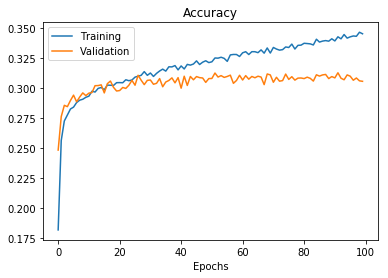

In [86]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
Y_pred = model.predict(X_test)

In [46]:
np.set_printoptions(threshold=np.nan)

In [47]:
y_pred = np.argmax(Y_pred,axis=1)
# print(y_pred)
# print ('\n')

In [48]:
np.set_printoptions(threshold=20)

In [49]:
pd.DataFrame(confusion_matrix(np.argmax(y_test_cat,axis=1),y_pred)).to_csv('confusion_m_RevA.csv')

### Next we will build a Multi Layer Perceptron Model

In [50]:
from sklearn.preprocessing import StandardScaler
from keras.utils.np_utils import to_categorical

In [51]:
sc = StandardScaler()

In [52]:
df_fe = df_fe.dropna()
df_test = df_test.dropna()

In [54]:
df_fe.to_csv('final_train_data.csv')
df_test.to_csv('final_test_data.csv')

In [55]:
X_train_MLP = np.array(df_fe.ix[:,['Pre_L_Period1','Pre_L_Period2','01_TEMP','02_TEMP','03_TEMP','04_TEMP','05_TEMP','06_TEMP','07_TEMP','08_TEMP','09_TEMP',
                                   'Pre_PreOvL1','Pre_PreOvL2','Pre_L_CYCLE1','Pre_L_CYCLE2','LastMonth_rolling_PREOVULATION',
                                   'Med3-Med6','Med3-Mean6','Med3-Min6','Mean3-Med6','Mean3-Mean6','Mean3-Min6','Max3-Median6',
                               'Max3-Mean6','Max3-Min6','Sum_Of_All']], dtype='float64')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [56]:
X_test_MLP = np.array(df_test.ix[:,['Pre_L_Period1','Pre_L_Period2','01_TEMP','02_TEMP','03_TEMP','04_TEMP','05_TEMP','06_TEMP','07_TEMP','08_TEMP','09_TEMP',
                                   'Pre_PreOvL1','Pre_PreOvL2','Pre_L_CYCLE1','Pre_L_CYCLE2','LastMonth_rolling_PREOVULATION',
                                   'Med3-Med6','Med3-Mean6','Med3-Min6','Mean3-Med6','Mean3-Mean6','Mean3-Min6','Max3-Median6',
                               'Max3-Mean6','Max3-Min6','Sum_Of_All']], dtype='float64')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [57]:
X_train_MLP = sc.fit_transform(X_train_MLP)
X_test_MLP = sc.fit_transform(X_test_MLP)

In [58]:
X_train_MLP

array([[ 0.5009,  0.4731, -0.0086, ..., -0.3751, -1.0102, -0.9513],
       [ 0.5009,  0.4731, -0.0086, ..., -1.3722, -1.8685, -1.4272],
       [ 0.5009,  0.4731, -0.0086, ..., -0.3105, -0.1744, -0.5157],
       ..., 
       [ 0.5009, -0.2942, -2.026 , ...,  1.6096,  1.6733,  2.1142],
       [ 0.5009, -0.2942, -1.9633, ...,  1.2791,  1.6089,  1.6638],
       [ 0.5009, -0.2942, -1.8829, ...,  0.8487,  1.5262,  1.1353]])

In [59]:
X_test_MLP

array([[ 0.5235, -0.1663,  1.2715, ...,  0.5348,  0.3481,  0.5843],
       [ 0.5235, -0.1663, -0.21  , ...,  0.7229,  0.3481,  0.6933],
       [ 0.5235,  0.4916,  0.0501, ..., -0.5784, -1.1632, -0.7583],
       ..., 
       [ 0.5235,  1.1495,  0.5309, ...,  1.0345,  0.8156,  0.4239],
       [ 0.5235,  1.1495,  0.5081, ...,  1.2006,  0.8156,  1.3144],
       [ 0.5235,  1.1495, -0.2668, ...,  1.3967,  0.8156,  1.6439]])

In [60]:
y_train = np.array(df_fe.ix[:,['Target_Pre_OV']], dtype='float64')
y_test = np.array(df_test.ix[:,['Target_Pre_OV']], dtype='float64')

In [61]:
output_vector_length = y_train.max()

In [62]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [63]:
print (X_train_MLP.shape)
print (X_test_MLP.shape)
print (y_train_cat.shape)
print (y_test_cat.shape)
print (output_vector_length)

(50694, 26)
(13613, 26)
(50694, 31)
(13613, 31)
30.0


### Building a "Multiclass" classification Multi Layer Perceptron Model

In [64]:
model = Sequential()

In [65]:
model.add(Dense(10, input_shape=(X_train_MLP.shape[1],), activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='tanh'))
model.add(Dense(int(output_vector_length)+1, activation='softmax'))

# Optimzer could be 'sgd', with below mentioned parameters, or default parameters
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.95, nesterov=True)

model.compile(optimizer = sgd, loss = 'categorical_crossentropy',
              metrics=['acc','mse'])

In [66]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_5 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 31)                2015      
Total para

In [67]:
h = model.fit(X_train_MLP, y_train_cat, epochs=200, verbose=1, 
              validation_split=0.15, batch_size = 512)

Train on 43089 samples, validate on 7605 samples
Epoch 1/200
43089/43089 [==============================] - 1s - loss: 2.8522 - acc: 0.1407 - mean_squared_error: 0.0295 - val_loss: 2.3351 - val_acc: 0.2046 - val_mean_squared_error: 0.0278
Epoch 2/200
43089/43089 [==============================] - 1s - loss: 2.2848 - acc: 0.2161 - mean_squared_error: 0.0275 - val_loss: 2.1914 - val_acc: 0.2235 - val_mean_squared_error: 0.0271
Epoch 3/200
43089/43089 [==============================] - 1s - loss: 2.2107 - acc: 0.2409 - mean_squared_error: 0.0269 - val_loss: 2.1320 - val_acc: 0.2543 - val_mean_squared_error: 0.0265
Epoch 4/200
43089/43089 [==============================] - 1s - loss: 2.1653 - acc: 0.2598 - mean_squared_error: 0.0264 - val_loss: 2.1078 - val_acc: 0.2581 - val_mean_squared_error: 0.0261
Epoch 5/200
43089/43089 [==============================] - 1s - loss: 2.1374 - acc: 0.2668 - mean_squared_error: 0.0261 - val_loss: 2.0807 - val_acc: 0.2664 - val_mean_squared_error: 0.0259
E

43089/43089 [==============================] - 1s - loss: 2.0094 - acc: 0.3114 - mean_squared_error: 0.0248 - val_loss: 2.0139 - val_acc: 0.2936 - val_mean_squared_error: 0.0250
Epoch 44/200
43089/43089 [==============================] - 1s - loss: 2.0107 - acc: 0.3098 - mean_squared_error: 0.0248 - val_loss: 2.0144 - val_acc: 0.2948 - val_mean_squared_error: 0.0250
Epoch 45/200
43089/43089 [==============================] - 1s - loss: 2.0069 - acc: 0.3118 - mean_squared_error: 0.0248 - val_loss: 2.0127 - val_acc: 0.2920 - val_mean_squared_error: 0.0251
Epoch 46/200
43089/43089 [==============================] - 1s - loss: 2.0077 - acc: 0.3115 - mean_squared_error: 0.0248 - val_loss: 2.0109 - val_acc: 0.2949 - val_mean_squared_error: 0.0250
Epoch 47/200
43089/43089 [==============================] - 1s - loss: 2.0065 - acc: 0.3110 - mean_squared_error: 0.0248 - val_loss: 2.0078 - val_acc: 0.2994 - val_mean_squared_error: 0.0250
Epoch 48/200
43089/43089 [==============================] 

43089/43089 [==============================] - 1s - loss: 1.9919 - acc: 0.3173 - mean_squared_error: 0.0247 - val_loss: 2.0073 - val_acc: 0.3026 - val_mean_squared_error: 0.0250
Epoch 86/200
43089/43089 [==============================] - 1s - loss: 1.9950 - acc: 0.3162 - mean_squared_error: 0.0247 - val_loss: 2.0023 - val_acc: 0.3037 - val_mean_squared_error: 0.0249
Epoch 87/200
43089/43089 [==============================] - 1s - loss: 1.9933 - acc: 0.3158 - mean_squared_error: 0.0247 - val_loss: 2.0125 - val_acc: 0.2935 - val_mean_squared_error: 0.0250
Epoch 88/200
43089/43089 [==============================] - 1s - loss: 1.9943 - acc: 0.3138 - mean_squared_error: 0.0247 - val_loss: 2.0108 - val_acc: 0.2977 - val_mean_squared_error: 0.0250
Epoch 89/200
43089/43089 [==============================] - 1s - loss: 1.9928 - acc: 0.3127 - mean_squared_error: 0.0247 - val_loss: 2.0086 - val_acc: 0.3048 - val_mean_squared_error: 0.0250
Epoch 90/200
43089/43089 [==============================] 

43089/43089 [==============================] - 1s - loss: 1.9828 - acc: 0.3186 - mean_squared_error: 0.0246 - val_loss: 2.0039 - val_acc: 0.3032 - val_mean_squared_error: 0.0249
Epoch 128/200
43089/43089 [==============================] - 1s - loss: 1.9830 - acc: 0.3186 - mean_squared_error: 0.0246 - val_loss: 2.0075 - val_acc: 0.2980 - val_mean_squared_error: 0.0249
Epoch 129/200
43089/43089 [==============================] - 1s - loss: 1.9826 - acc: 0.3183 - mean_squared_error: 0.0246 - val_loss: 2.0048 - val_acc: 0.3009 - val_mean_squared_error: 0.0249
Epoch 130/200
43089/43089 [==============================] - 1s - loss: 1.9833 - acc: 0.3182 - mean_squared_error: 0.0246 - val_loss: 2.0076 - val_acc: 0.2989 - val_mean_squared_error: 0.0249
Epoch 131/200
43089/43089 [==============================] - 1s - loss: 1.9830 - acc: 0.3184 - mean_squared_error: 0.0246 - val_loss: 2.0062 - val_acc: 0.3030 - val_mean_squared_error: 0.0249
Epoch 132/200
43089/43089 [===========================

43089/43089 [==============================] - 1s - loss: 1.9759 - acc: 0.3221 - mean_squared_error: 0.0246 - val_loss: 2.0073 - val_acc: 0.2978 - val_mean_squared_error: 0.0250
Epoch 170/200
43089/43089 [==============================] - 1s - loss: 1.9750 - acc: 0.3209 - mean_squared_error: 0.0246 - val_loss: 2.0112 - val_acc: 0.2998 - val_mean_squared_error: 0.0250
Epoch 171/200
43089/43089 [==============================] - 1s - loss: 1.9764 - acc: 0.3192 - mean_squared_error: 0.0246 - val_loss: 2.0167 - val_acc: 0.2928 - val_mean_squared_error: 0.0250
Epoch 172/200
43089/43089 [==============================] - 1s - loss: 1.9746 - acc: 0.3184 - mean_squared_error: 0.0246 - val_loss: 2.0090 - val_acc: 0.3007 - val_mean_squared_error: 0.0249
Epoch 173/200
43089/43089 [==============================] - 1s - loss: 1.9736 - acc: 0.3209 - mean_squared_error: 0.0245 - val_loss: 2.0061 - val_acc: 0.2961 - val_mean_squared_error: 0.0249
Epoch 174/200
43089/43089 [===========================

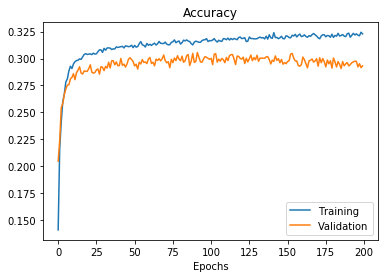

In [68]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [69]:
y_pred = model.predict(X_test_MLP)

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
Y_pred = model.predict(X_test_MLP)
np.set_printoptions(threshold=np.nan)
y_pred = np.argmax(Y_pred,axis=1)
# print(y_pred)
# print ('\n')

In [71]:
predcited_Cat = pd.DataFrame(y_pred)
predcited_Cat.to_csv('predicted_cat.csv')

In [72]:
pd.DataFrame(confusion_matrix(np.argmax(y_test_cat,axis=1),y_pred)).to_csv('confusion_m_MLP_RevA.csv')

In [73]:
# y_test_class = np.argmax(y_test,axis=1)
# y_pred_class = np.argmax(Y_pred,axis =1)
# print (accuracy_score(y_test_class, y_pred_class))
# print (classification_report(y_test_class,y_pred_class))
# print (confusion_matrix(y_test_class,y_pred_class))

### Building a "Regression" Multi Layer Perceptron Model

In [74]:
np.set_printoptions(threshold=np.nan)

In [75]:
model = Sequential()
model.add(Dense(32, input_shape=(X_train_MLP.shape[1],), activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))

model.compile(optimizer = 'adam', loss = 'mse',
              metrics=['acc', 'mae','mse'])

In [76]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                864       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total para

In [77]:
h = model.fit(X_train_MLP, y_train, epochs=500, verbose=1, 
              validation_split=0.15, batch_size = 512)

Train on 43089 samples, validate on 7605 samples
Epoch 1/500
43089/43089 [==============================] - 1s - loss: 48.6649 - acc: 0.0574 - mean_absolute_error: 5.5098 - mean_squared_error: 48.6649 - val_loss: 17.1122 - val_acc: 0.0893 - val_mean_absolute_error: 3.2909 - val_mean_squared_error: 17.1122
Epoch 2/500
43089/43089 [==============================] - 0s - loss: 16.4426 - acc: 0.1080 - mean_absolute_error: 3.0831 - mean_squared_error: 16.4426 - val_loss: 11.8806 - val_acc: 0.1210 - val_mean_absolute_error: 2.6717 - val_mean_squared_error: 11.8806
Epoch 3/500
43089/43089 [==============================] - 0s - loss: 13.1316 - acc: 0.1275 - mean_absolute_error: 2.7072 - mean_squared_error: 13.1316 - val_loss: 9.7744 - val_acc: 0.1333 - val_mean_absolute_error: 2.4304 - val_mean_squared_error: 9.7744
Epoch 4/500
43089/43089 [==============================] - 0s - loss: 11.3049 - acc: 0.1407 - mean_absolute_error: 2.4902 - mean_squared_error: 11.3049 - val_loss: 8.4489 - val_ac

43089/43089 [==============================] - 0s - loss: 7.4960 - acc: 0.1881 - mean_absolute_error: 1.9766 - mean_squared_error: 7.4960 - val_loss: 6.0383 - val_acc: 0.1916 - val_mean_absolute_error: 1.8791 - val_mean_squared_error: 6.0383
Epoch 33/500
43089/43089 [==============================] - 0s - loss: 7.4570 - acc: 0.1929 - mean_absolute_error: 1.9664 - mean_squared_error: 7.4570 - val_loss: 6.0160 - val_acc: 0.1979 - val_mean_absolute_error: 1.8585 - val_mean_squared_error: 6.0160
Epoch 34/500
43089/43089 [==============================] - 0s - loss: 7.3709 - acc: 0.1877 - mean_absolute_error: 1.9562 - mean_squared_error: 7.3709 - val_loss: 6.1236 - val_acc: 0.1809 - val_mean_absolute_error: 1.9084 - val_mean_squared_error: 6.1236
Epoch 35/500
43089/43089 [==============================] - 0s - loss: 7.3890 - acc: 0.1878 - mean_absolute_error: 1.9574 - mean_squared_error: 7.3890 - val_loss: 6.0733 - val_acc: 0.1988 - val_mean_absolute_error: 1.8828 - val_mean_squared_error: 

43089/43089 [==============================] - 0s - loss: 6.9667 - acc: 0.2022 - mean_absolute_error: 1.8873 - mean_squared_error: 6.9667 - val_loss: 6.1263 - val_acc: 0.2004 - val_mean_absolute_error: 1.8894 - val_mean_squared_error: 6.1263
Epoch 65/500
43089/43089 [==============================] - 0s - loss: 6.9130 - acc: 0.2093 - mean_absolute_error: 1.8774 - mean_squared_error: 6.9130 - val_loss: 6.1260 - val_acc: 0.1951 - val_mean_absolute_error: 1.8857 - val_mean_squared_error: 6.1260
Epoch 66/500
43089/43089 [==============================] - 0s - loss: 6.8902 - acc: 0.2049 - mean_absolute_error: 1.8723 - mean_squared_error: 6.8902 - val_loss: 6.0858 - val_acc: 0.2117 - val_mean_absolute_error: 1.8500 - val_mean_squared_error: 6.0858
Epoch 67/500
43089/43089 [==============================] - 0s - loss: 6.8593 - acc: 0.2049 - mean_absolute_error: 1.8698 - mean_squared_error: 6.8593 - val_loss: 6.1236 - val_acc: 0.1928 - val_mean_absolute_error: 1.8788 - val_mean_squared_error: 

43089/43089 [==============================] - 0s - loss: 6.6127 - acc: 0.2114 - mean_absolute_error: 1.8335 - mean_squared_error: 6.6127 - val_loss: 6.3783 - val_acc: 0.1803 - val_mean_absolute_error: 1.9394 - val_mean_squared_error: 6.3783
Epoch 97/500
43089/43089 [==============================] - 0s - loss: 6.6115 - acc: 0.2098 - mean_absolute_error: 1.8377 - mean_squared_error: 6.6115 - val_loss: 6.3345 - val_acc: 0.1729 - val_mean_absolute_error: 1.9436 - val_mean_squared_error: 6.3345
Epoch 98/500
43089/43089 [==============================] - 0s - loss: 6.6200 - acc: 0.2082 - mean_absolute_error: 1.8407 - mean_squared_error: 6.6200 - val_loss: 6.2475 - val_acc: 0.2156 - val_mean_absolute_error: 1.8676 - val_mean_squared_error: 6.2475
Epoch 99/500
43089/43089 [==============================] - 0s - loss: 6.5907 - acc: 0.2104 - mean_absolute_error: 1.8327 - mean_squared_error: 6.5907 - val_loss: 6.2038 - val_acc: 0.1808 - val_mean_absolute_error: 1.9088 - val_mean_squared_error: 

43089/43089 [==============================] - 0s - loss: 6.2979 - acc: 0.2130 - mean_absolute_error: 1.8019 - mean_squared_error: 6.2979 - val_loss: 6.2955 - val_acc: 0.2167 - val_mean_absolute_error: 1.8655 - val_mean_squared_error: 6.2955
Epoch 129/500
43089/43089 [==============================] - 0s - loss: 6.3257 - acc: 0.2109 - mean_absolute_error: 1.8008 - mean_squared_error: 6.3257 - val_loss: 6.2810 - val_acc: 0.1967 - val_mean_absolute_error: 1.8877 - val_mean_squared_error: 6.2810
Epoch 130/500
43089/43089 [==============================] - 0s - loss: 6.3210 - acc: 0.2111 - mean_absolute_error: 1.8012 - mean_squared_error: 6.3210 - val_loss: 6.2942 - val_acc: 0.2160 - val_mean_absolute_error: 1.8656 - val_mean_squared_error: 6.2942
Epoch 131/500
43089/43089 [==============================] - 0s - loss: 6.3265 - acc: 0.2109 - mean_absolute_error: 1.8032 - mean_squared_error: 6.3265 - val_loss: 6.3092 - val_acc: 0.2058 - val_mean_absolute_error: 1.8985 - val_mean_squared_erro

43089/43089 [==============================] - 0s - loss: 6.1211 - acc: 0.2142 - mean_absolute_error: 1.7786 - mean_squared_error: 6.1211 - val_loss: 6.4626 - val_acc: 0.2151 - val_mean_absolute_error: 1.8855 - val_mean_squared_error: 6.4626
Epoch 160/500
43089/43089 [==============================] - 0s - loss: 6.1478 - acc: 0.2160 - mean_absolute_error: 1.7826 - mean_squared_error: 6.1478 - val_loss: 6.4699 - val_acc: 0.1988 - val_mean_absolute_error: 1.9049 - val_mean_squared_error: 6.4699
Epoch 161/500
43089/43089 [==============================] - 0s - loss: 6.1464 - acc: 0.2095 - mean_absolute_error: 1.7857 - mean_squared_error: 6.1464 - val_loss: 6.4463 - val_acc: 0.2159 - val_mean_absolute_error: 1.8820 - val_mean_squared_error: 6.4463
Epoch 162/500
43089/43089 [==============================] - 0s - loss: 6.0869 - acc: 0.2155 - mean_absolute_error: 1.7739 - mean_squared_error: 6.0869 - val_loss: 6.4201 - val_acc: 0.2167 - val_mean_absolute_error: 1.8841 - val_mean_squared_erro

43089/43089 [==============================] - 0s - loss: 5.9247 - acc: 0.2192 - mean_absolute_error: 1.7507 - mean_squared_error: 5.9247 - val_loss: 6.4798 - val_acc: 0.2162 - val_mean_absolute_error: 1.8951 - val_mean_squared_error: 6.4798
Epoch 191/500
43089/43089 [==============================] - 0s - loss: 5.9138 - acc: 0.2156 - mean_absolute_error: 1.7531 - mean_squared_error: 5.9138 - val_loss: 6.6403 - val_acc: 0.2070 - val_mean_absolute_error: 1.9166 - val_mean_squared_error: 6.6403
Epoch 192/500
43089/43089 [==============================] - 0s - loss: 5.9144 - acc: 0.2161 - mean_absolute_error: 1.7532 - mean_squared_error: 5.9144 - val_loss: 6.5246 - val_acc: 0.1987 - val_mean_absolute_error: 1.9174 - val_mean_squared_error: 6.5246
Epoch 193/500
43089/43089 [==============================] - 0s - loss: 5.8760 - acc: 0.2142 - mean_absolute_error: 1.7512 - mean_squared_error: 5.8760 - val_loss: 6.5505 - val_acc: 0.2072 - val_mean_absolute_error: 1.9031 - val_mean_squared_erro

43089/43089 [==============================] - 0s - loss: 5.6883 - acc: 0.2170 - mean_absolute_error: 1.7266 - mean_squared_error: 5.6883 - val_loss: 6.7509 - val_acc: 0.2003 - val_mean_absolute_error: 1.9336 - val_mean_squared_error: 6.7509
Epoch 223/500
43089/43089 [==============================] - 0s - loss: 5.7338 - acc: 0.2122 - mean_absolute_error: 1.7382 - mean_squared_error: 5.7338 - val_loss: 6.8191 - val_acc: 0.1937 - val_mean_absolute_error: 1.9595 - val_mean_squared_error: 6.8191
Epoch 224/500
43089/43089 [==============================] - 0s - loss: 5.6731 - acc: 0.2162 - mean_absolute_error: 1.7273 - mean_squared_error: 5.6731 - val_loss: 6.8397 - val_acc: 0.1945 - val_mean_absolute_error: 1.9554 - val_mean_squared_error: 6.8397
Epoch 225/500
43089/43089 [==============================] - 0s - loss: 5.6925 - acc: 0.2130 - mean_absolute_error: 1.7304 - mean_squared_error: 5.6925 - val_loss: 6.9332 - val_acc: 0.2049 - val_mean_absolute_error: 1.9362 - val_mean_squared_erro

43089/43089 [==============================] - 0s - loss: 5.4741 - acc: 0.2146 - mean_absolute_error: 1.7058 - mean_squared_error: 5.4741 - val_loss: 6.9750 - val_acc: 0.1933 - val_mean_absolute_error: 1.9649 - val_mean_squared_error: 6.9750
Epoch 255/500
43089/43089 [==============================] - 0s - loss: 5.4428 - acc: 0.2168 - mean_absolute_error: 1.6999 - mean_squared_error: 5.4428 - val_loss: 7.0088 - val_acc: 0.1968 - val_mean_absolute_error: 1.9674 - val_mean_squared_error: 7.0088
Epoch 256/500
43089/43089 [==============================] - 0s - loss: 5.4944 - acc: 0.2174 - mean_absolute_error: 1.7064 - mean_squared_error: 5.4944 - val_loss: 7.0438 - val_acc: 0.1959 - val_mean_absolute_error: 1.9775 - val_mean_squared_error: 7.0438
Epoch 257/500
43089/43089 [==============================] - 0s - loss: 5.4688 - acc: 0.2174 - mean_absolute_error: 1.7026 - mean_squared_error: 5.4688 - val_loss: 6.9401 - val_acc: 0.2033 - val_mean_absolute_error: 1.9467 - val_mean_squared_erro

43089/43089 [==============================] - 0s - loss: 5.2888 - acc: 0.2174 - mean_absolute_error: 1.6797 - mean_squared_error: 5.2888 - val_loss: 7.0293 - val_acc: 0.1974 - val_mean_absolute_error: 1.9885 - val_mean_squared_error: 7.0293
Epoch 287/500
43089/43089 [==============================] - 0s - loss: 5.2966 - acc: 0.2173 - mean_absolute_error: 1.6839 - mean_squared_error: 5.2966 - val_loss: 7.0196 - val_acc: 0.1938 - val_mean_absolute_error: 1.9742 - val_mean_squared_error: 7.0196
Epoch 288/500
43089/43089 [==============================] - 0s - loss: 5.2717 - acc: 0.2199 - mean_absolute_error: 1.6787 - mean_squared_error: 5.2717 - val_loss: 7.0824 - val_acc: 0.1934 - val_mean_absolute_error: 1.9936 - val_mean_squared_error: 7.0824
Epoch 289/500
43089/43089 [==============================] - 0s - loss: 5.2469 - acc: 0.2198 - mean_absolute_error: 1.6704 - mean_squared_error: 5.2469 - val_loss: 7.0704 - val_acc: 0.1975 - val_mean_absolute_error: 1.9697 - val_mean_squared_erro

43089/43089 [==============================] - 0s - loss: 5.0804 - acc: 0.2192 - mean_absolute_error: 1.6544 - mean_squared_error: 5.0804 - val_loss: 7.2139 - val_acc: 0.1829 - val_mean_absolute_error: 2.0023 - val_mean_squared_error: 7.2139
Epoch 319/500
43089/43089 [==============================] - 0s - loss: 5.0793 - acc: 0.2188 - mean_absolute_error: 1.6560 - mean_squared_error: 5.0793 - val_loss: 7.1549 - val_acc: 0.1976 - val_mean_absolute_error: 1.9827 - val_mean_squared_error: 7.1549
Epoch 320/500
43089/43089 [==============================] - 0s - loss: 5.0616 - acc: 0.2218 - mean_absolute_error: 1.6479 - mean_squared_error: 5.0616 - val_loss: 7.1862 - val_acc: 0.1932 - val_mean_absolute_error: 1.9874 - val_mean_squared_error: 7.1862
Epoch 321/500
43089/43089 [==============================] - 0s - loss: 5.0530 - acc: 0.2201 - mean_absolute_error: 1.6484 - mean_squared_error: 5.0530 - val_loss: 7.3314 - val_acc: 0.1786 - val_mean_absolute_error: 2.0443 - val_mean_squared_erro

43089/43089 [==============================] - 0s - loss: 4.8795 - acc: 0.2211 - mean_absolute_error: 1.6271 - mean_squared_error: 4.8795 - val_loss: 7.2968 - val_acc: 0.1833 - val_mean_absolute_error: 2.0247 - val_mean_squared_error: 7.2968
Epoch 351/500
43089/43089 [==============================] - 0s - loss: 4.8830 - acc: 0.2183 - mean_absolute_error: 1.6307 - mean_squared_error: 4.8830 - val_loss: 7.3352 - val_acc: 0.1879 - val_mean_absolute_error: 2.0161 - val_mean_squared_error: 7.3352
Epoch 352/500
43089/43089 [==============================] - 0s - loss: 4.8946 - acc: 0.2223 - mean_absolute_error: 1.6309 - mean_squared_error: 4.8946 - val_loss: 7.5986 - val_acc: 0.1755 - val_mean_absolute_error: 2.0817 - val_mean_squared_error: 7.5986
Epoch 353/500
43089/43089 [==============================] - 0s - loss: 4.8482 - acc: 0.2227 - mean_absolute_error: 1.6246 - mean_squared_error: 4.8482 - val_loss: 7.3550 - val_acc: 0.1811 - val_mean_absolute_error: 2.0333 - val_mean_squared_erro

43089/43089 [==============================] - 0s - loss: 4.7408 - acc: 0.2191 - mean_absolute_error: 1.6133 - mean_squared_error: 4.7408 - val_loss: 7.3981 - val_acc: 0.1847 - val_mean_absolute_error: 2.0177 - val_mean_squared_error: 7.3981
Epoch 382/500
43089/43089 [==============================] - 0s - loss: 4.7532 - acc: 0.2210 - mean_absolute_error: 1.6156 - mean_squared_error: 4.7532 - val_loss: 7.4832 - val_acc: 0.1886 - val_mean_absolute_error: 2.0369 - val_mean_squared_error: 7.4832
Epoch 383/500
43089/43089 [==============================] - 0s - loss: 4.7339 - acc: 0.2237 - mean_absolute_error: 1.6058 - mean_squared_error: 4.7339 - val_loss: 7.4373 - val_acc: 0.1901 - val_mean_absolute_error: 2.0238 - val_mean_squared_error: 7.4373
Epoch 384/500
43089/43089 [==============================] - 0s - loss: 4.6867 - acc: 0.2236 - mean_absolute_error: 1.6011 - mean_squared_error: 4.6867 - val_loss: 7.5194 - val_acc: 0.1778 - val_mean_absolute_error: 2.0482 - val_mean_squared_erro

43089/43089 [==============================] - 0s - loss: 4.5575 - acc: 0.2244 - mean_absolute_error: 1.5844 - mean_squared_error: 4.5575 - val_loss: 7.5212 - val_acc: 0.1896 - val_mean_absolute_error: 2.0409 - val_mean_squared_error: 7.5212
Epoch 414/500
43089/43089 [==============================] - 0s - loss: 4.6163 - acc: 0.2237 - mean_absolute_error: 1.5917 - mean_squared_error: 4.6163 - val_loss: 7.6522 - val_acc: 0.1821 - val_mean_absolute_error: 2.0645 - val_mean_squared_error: 7.6522
Epoch 415/500
43089/43089 [==============================] - 0s - loss: 4.5871 - acc: 0.2232 - mean_absolute_error: 1.5913 - mean_squared_error: 4.5871 - val_loss: 7.4641 - val_acc: 0.1816 - val_mean_absolute_error: 2.0461 - val_mean_squared_error: 7.4641
Epoch 416/500
43089/43089 [==============================] - 0s - loss: 4.5784 - acc: 0.2243 - mean_absolute_error: 1.5867 - mean_squared_error: 4.5784 - val_loss: 7.4855 - val_acc: 0.1838 - val_mean_absolute_error: 2.0466 - val_mean_squared_erro

43089/43089 [==============================] - 0s - loss: 4.4882 - acc: 0.2235 - mean_absolute_error: 1.5756 - mean_squared_error: 4.4882 - val_loss: 7.5863 - val_acc: 0.1833 - val_mean_absolute_error: 2.0539 - val_mean_squared_error: 7.5863
Epoch 446/500
43089/43089 [==============================] - 0s - loss: 4.4633 - acc: 0.2238 - mean_absolute_error: 1.5723 - mean_squared_error: 4.4633 - val_loss: 7.4906 - val_acc: 0.1866 - val_mean_absolute_error: 2.0512 - val_mean_squared_error: 7.4906
Epoch 447/500
43089/43089 [==============================] - 0s - loss: 4.4405 - acc: 0.2247 - mean_absolute_error: 1.5679 - mean_squared_error: 4.4405 - val_loss: 7.6211 - val_acc: 0.1798 - val_mean_absolute_error: 2.0729 - val_mean_squared_error: 7.6211
Epoch 448/500
43089/43089 [==============================] - 0s - loss: 4.4341 - acc: 0.2256 - mean_absolute_error: 1.5669 - mean_squared_error: 4.4341 - val_loss: 7.5734 - val_acc: 0.1840 - val_mean_absolute_error: 2.0553 - val_mean_squared_erro

43089/43089 [==============================] - 0s - loss: 4.3113 - acc: 0.2298 - mean_absolute_error: 1.5457 - mean_squared_error: 4.3113 - val_loss: 7.7319 - val_acc: 0.1787 - val_mean_absolute_error: 2.0937 - val_mean_squared_error: 7.7319
Epoch 478/500
43089/43089 [==============================] - 0s - loss: 4.3564 - acc: 0.2285 - mean_absolute_error: 1.5554 - mean_squared_error: 4.3564 - val_loss: 7.5270 - val_acc: 0.1850 - val_mean_absolute_error: 2.0492 - val_mean_squared_error: 7.5270
Epoch 479/500
43089/43089 [==============================] - 0s - loss: 4.3076 - acc: 0.2269 - mean_absolute_error: 1.5467 - mean_squared_error: 4.3076 - val_loss: 7.5156 - val_acc: 0.1861 - val_mean_absolute_error: 2.0465 - val_mean_squared_error: 7.5156
Epoch 480/500
43089/43089 [==============================] - 0s - loss: 4.3136 - acc: 0.2291 - mean_absolute_error: 1.5482 - mean_squared_error: 4.3136 - val_loss: 7.6052 - val_acc: 0.1838 - val_mean_absolute_error: 2.0599 - val_mean_squared_erro

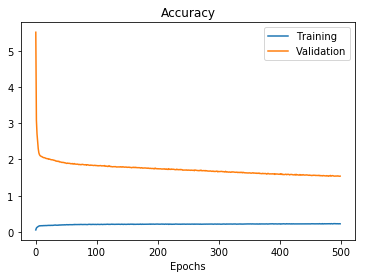

In [78]:
plt.plot(h.history['acc'])
# plt.plot(h.history['mean_absolute_error'])
plt.plot(h.history['mean_absolute_error'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [79]:
Y_pred = model.predict(X_test_MLP)

In [80]:
pd.DataFrame(Y_pred).to_csv('predicted_regression_output.csv')

In [81]:
Y_pred.size

13613

In [82]:
np.set_printoptions(threshold=20)